In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, Flatten
from keras.optimizers import SGD
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
gpu_options = tf.GPUOptions(allow_growth=True)
config=tf.ConfigProto(gpu_options=gpu_options)

config.gpu_options.visible_device_list = "0"
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [4]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [56]:
x_train = np.asarray(mnist.train.images)
x_train = np.reshape(x_train,(-1, 28,28,1))
y_train = np.asarray(mnist.train.labels)
x_test = np.asarray(mnist.test.images)
x_test = np.reshape(x_test,(-1, 28,28,1))
y_test = np.asarray(mnist.test.labels)

In [53]:
input_shape = (28, 28, 1)
num_classes = 10

In [57]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(10, 10), strides= (5,5), activation='relu', input_shape = input_shape ))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum = 0.9),
              metrics=['accuracy'])

In [58]:
model.fit(x_train, y_train,
          epochs= 10,
          batch_size=20,
          verbose = 1)

Epoch 1/10
55000/55000 [==============================] - 8s 152us/step - loss: 0.2608 - acc: 0.9195
Epoch 2/10
55000/55000 [==============================] - 7s 119us/step - loss: 0.1069 - acc: 0.9669
Epoch 3/10
55000/55000 [==============================] - 7s 119us/step - loss: 0.0785 - acc: 0.9751
Epoch 4/10
55000/55000 [==============================] - 7s 119us/step - loss: 0.0609 - acc: 0.9801
Epoch 5/10
55000/55000 [==============================] - 7s 121us/step - loss: 0.0518 - acc: 0.9832
Epoch 6/10
55000/55000 [==============================] - 7s 122us/step - loss: 0.0420 - acc: 0.9864
Epoch 7/10
55000/55000 [==============================] - 7s 123us/step - loss: 0.0364 - acc: 0.9880
Epoch 8/10
55000/55000 [==============================] - 7s 123us/step - loss: 0.0320 - acc: 0.9897
Epoch 9/10
55000/55000 [==============================] - 7s 122us/step - loss: 0.0261 - acc: 0.9912
Epoch 10/10
55000/55000 [==============================] - 7s 123us/step - loss: 0.0222 - a

In [59]:
score = model.evaluate(x_test, y_test, batch_size= 20)
print("Testing Accuracy: ", score[1])

10000/10000 [==============================] - 1s 53us/step
Testing Accuracy:  0.977499994993


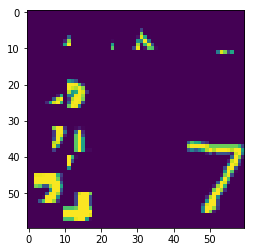

In [2]:
data_path = 'mnist_cluttered_train_data.tfrecords'  # address to save the hdf5 file
gpu_options = tf.GPUOptions(allow_growth=True)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    feature = {'train/image': tf.FixedLenFeature([], tf.string),
               'train/label': tf.FixedLenFeature([], tf.int64)}
   
    # Create a list of filenames and pass it to a queue
    filename_queue = tf.train.string_input_producer([data_path], num_epochs=1)
    # Define a reader and read the next record
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)
    # Decode the record read by the reader
    features = tf.parse_single_example(serialized_example, features=feature)
    # Convert the image data from string back to the numbers
    image = tf.decode_raw(features['train/image'], tf.float32)
    
    # Cast label data into int32
    label = tf.cast(features['train/label'], tf.int32)
    # Reshape image data into the original shape
    image = tf.reshape(image, (60,60))
    
    # Any preprocessing here ...
    
    # Creates batches by randomly shuffling tensors

    train_images = []
    train_labels = []
    # Initialize all global and local variables
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    # Create a coordinator and run all QueueRunner objects
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    for batch_index in range(55000):
        img, lbl = sess.run([image, label])
        train_images.append(img)
        train_labels.append(lbl)
    # Stop the threads
    coord.request_stop()
    
    # Wait for threads to stop
    coord.join(threads)
    sess.close()

plt.imshow(train_images[0])

data_path = 'mnist_cluttered_test_data.tfrecords'  # address to save the hdf5 file
gpu_options = tf.GPUOptions(allow_growth=True)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    feature = {'test/image': tf.FixedLenFeature([], tf.string),
               'test/label': tf.FixedLenFeature([], tf.int64)}
   
    # Create a list of filenames and pass it to a queue
    filename_queue = tf.train.string_input_producer([data_path], num_epochs=1)
    # Define a reader and read the next record
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)
    # Decode the record read by the reader
    features = tf.parse_single_example(serialized_example, features=feature)
    # Convert the image data from string back to the numbers
    image = tf.decode_raw(features['test/image'], tf.float32)
    
    # Cast label data into int32
    label = tf.cast(features['test/label'], tf.int32)
    # Reshape image data into the original shape
    image = tf.reshape(image, (60,60))
    
    test_images = []
    test_labels = []
# Initialize all global and local variables
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    # Create a coordinator and run all QueueRunner objects
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    for batch_index in range(10000):
        img, lbl = sess.run([image, label])
        test_images.append(img)
        test_labels.append(lbl)
    # Stop the threads
    coord.request_stop()
    
    # Wait for threads to stop
    coord.join(threads)
    sess.close()

plt.imshow(test_images[0])

In [3]:

onehot_train_labels = np.zeros((55000, 10))
onehot_train_labels[np.arange(55000), train_labels] = 1


onehot_test_labels = np.zeros((10000, 10))
onehot_test_labels[np.arange(10000), test_labels] = 1

In [4]:
x_train = np.asarray(train_images)
x_train = np.reshape(x_train,(-1, 60, 60,1))
y_train = np.asarray(train_labels)
x_test = np.asarray(test_images)
x_test = np.reshape(x_test,(-1, 60,60,1))
y_test = np.asarray(test_labels)

input_shape = (60, 60, 1)
num_classes = 10

In [16]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(10, 10), strides= (5,5), activation='relu', input_shape = input_shape ))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum = 0.9),
              metrics=['accuracy'])

In [17]:
model.fit(x_train, onehot_train_labels,
          epochs= 25,
          batch_size=20,
          verbose = 1)

Epoch 1/25
55000/55000 [==============================] - 9s 159us/step - loss: 2.1883 - acc: 0.1833
Epoch 2/25
55000/55000 [==============================] - 9s 158us/step - loss: 1.8077 - acc: 0.3484
Epoch 3/25
55000/55000 [==============================] - 9s 162us/step - loss: 1.3824 - acc: 0.5130
Epoch 4/25
55000/55000 [==============================] - 9s 160us/step - loss: 1.1010 - acc: 0.6169
Epoch 5/25
55000/55000 [==============================] - 9s 156us/step - loss: 0.8964 - acc: 0.6877
Epoch 6/25
55000/55000 [==============================] - 9s 155us/step - loss: 0.7316 - acc: 0.7469
Epoch 7/25
55000/55000 [==============================] - 8s 153us/step - loss: 0.5955 - acc: 0.7947
Epoch 8/25
55000/55000 [==============================] - 8s 152us/step - loss: 0.4954 - acc: 0.8281
Epoch 9/25
55000/55000 [==============================] - 8s 153us/step - loss: 0.4154 - acc: 0.8566
Epoch 10/25
55000/55000 [==============================] - 8s 153us/step - loss: 0.3695 - a

In [18]:

score = model.evaluate(x_test, onehot_test_labels, batch_size= 20)
print("Testing Accuracy: ", score[1])

10000/10000 [==============================] - 1s 83us/step
Testing Accuracy:  0.5481000005304814


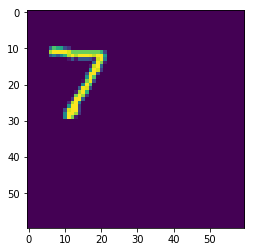

In [19]:
data_path = 'mnist_shifted_train_data.tfrecords'  # address to save the hdf5 file
gpu_options = tf.GPUOptions(allow_growth=True)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    feature = {'train/image': tf.FixedLenFeature([], tf.string),
               'train/label': tf.FixedLenFeature([], tf.int64)}
   
    # Create a list of filenames and pass it to a queue
    filename_queue = tf.train.string_input_producer([data_path], num_epochs=1)
    # Define a reader and read the next record
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)
    # Decode the record read by the reader
    features = tf.parse_single_example(serialized_example, features=feature)
    # Convert the image data from string back to the numbers
    image = tf.decode_raw(features['train/image'], tf.float32)
    
    # Cast label data into int32
    label = tf.cast(features['train/label'], tf.int32)
    # Reshape image data into the original shape
    image = tf.reshape(image, (60,60))
    
    # Any preprocessing here ...
    
    # Creates batches by randomly shuffling tensors

    train_images = []
    train_labels = []
    # Initialize all global and local variables
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    # Create a coordinator and run all QueueRunner objects
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    for batch_index in range(55000):
        img, lbl = sess.run([image, label])
        train_images.append(img)
        train_labels.append(lbl)
    # Stop the threads
    coord.request_stop()
    
    # Wait for threads to stop
    coord.join(threads)
    sess.close()

plt.imshow(train_images[0])

data_path = 'mnist_shifted_test_data.tfrecords'  # address to save the hdf5 file
gpu_options = tf.GPUOptions(allow_growth=True)
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    feature = {'test/image': tf.FixedLenFeature([], tf.string),
               'test/label': tf.FixedLenFeature([], tf.int64)}
   
    # Create a list of filenames and pass it to a queue
    filename_queue = tf.train.string_input_producer([data_path], num_epochs=1)
    # Define a reader and read the next record
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)
    # Decode the record read by the reader
    features = tf.parse_single_example(serialized_example, features=feature)
    # Convert the image data from string back to the numbers
    image = tf.decode_raw(features['test/image'], tf.float32)
    
    # Cast label data into int32
    label = tf.cast(features['test/label'], tf.int32)
    # Reshape image data into the original shape
    image = tf.reshape(image, (60,60))
    
    test_images = []
    test_labels = []
# Initialize all global and local variables
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    # Create a coordinator and run all QueueRunner objects
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    for batch_index in range(10000):
        img, lbl = sess.run([image, label])
        test_images.append(img)
        test_labels.append(lbl)
    # Stop the threads
    coord.request_stop()
    
    # Wait for threads to stop
    coord.join(threads)
    sess.close()





plt.imshow(test_images[0])



In [20]:

onehot_train_labels = np.zeros((55000, 10))
onehot_train_labels[np.arange(55000), train_labels] = 1


onehot_test_labels = np.zeros((10000, 10))
onehot_test_labels[np.arange(10000), test_labels] = 1

x_train = np.asarray(train_images)
x_train = np.reshape(x_train,(-1, 60, 60,1))
y_train = np.asarray(train_labels)
x_test = np.asarray(test_images)
x_test = np.reshape(x_test,(-1, 60,60,1))
y_test = np.asarray(test_labels)

input_shape = (60, 60, 1)
num_classes = 10






In [26]:

model = Sequential()
model.add(Conv2D(8, kernel_size=(10, 10), strides= (5,5), activation='relu', input_shape = input_shape ))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum = 0.9),
              metrics=['accuracy'])


In [27]:

model.fit(x_train, onehot_train_labels,
          epochs= 20,
          batch_size=20,
          verbose = 1)

Epoch 1/20
55000/55000 [==============================] - 9s 156us/step - loss: 1.8162 - acc: 0.3345
Epoch 2/20
55000/55000 [==============================] - 9s 155us/step - loss: 1.0258 - acc: 0.6473
Epoch 3/20
55000/55000 [==============================] - 8s 153us/step - loss: 0.7224 - acc: 0.7612
Epoch 4/20
55000/55000 [==============================] - 8s 153us/step - loss: 0.5719 - acc: 0.8112
Epoch 5/20
55000/55000 [==============================] - 8s 153us/step - loss: 0.4789 - acc: 0.8400
Epoch 6/20
55000/55000 [==============================] - 8s 153us/step - loss: 0.4018 - acc: 0.8652
Epoch 7/20
55000/55000 [==============================] - 8s 154us/step - loss: 0.3475 - acc: 0.8822
Epoch 8/20
55000/55000 [==============================] - 8s 154us/step - loss: 0.3068 - acc: 0.8957
Epoch 9/20
55000/55000 [==============================] - 8s 154us/step - loss: 0.2600 - acc: 0.9107
Epoch 10/20
55000/55000 [==============================] - 8s 152us/step - loss: 0.2358 - a

In [28]:

score = model.evaluate(x_test, onehot_test_labels, batch_size= 20)
print("Testing Accuracy: ", score[1])

10000/10000 [==============================] - 1s 96us/step
Testing Accuracy:  0.7990000002384186


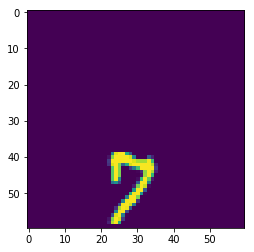

In [34]:
plt.imshow(train_images[89])